# <b><span style='color:#F1A424'>AutoML - Binary Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used - Bank Churn Dataset**

**Features**:

- `customer_id`: customer_id .
- `credit_score`: credit score of customer.
- `country`: country of customer.
- `gender`: Gender of customer.
- `age`: Age of customer.
- `tenure`: tenure.
- `balance`: bank balance.
- `products_number`: products number.
- `credit_card`: having credit card or not.
- `active_member`: active member or not.
- `estimated_salary`: Estimated salary of customer..

**Target Variable**:

- `churn`: 1 if the client has left the bank during some period or 0 if he/she has not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the Customer Churn for ABC Bank.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_churn')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_churn")

In [6]:
# first 5 rows
bank_df.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [7]:
# bank_df dataset
bank_df.shape

(10000, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,sampleid
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,1
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,2
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0,1
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0,2
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0,2
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0,1
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0,2
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,2
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0,1


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8000, 12)

In [12]:
# test data shape
bank_df_test.shape

(2000, 12)

In [13]:
#train dataset
bank_df_train.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15566030,497,Germany,Male,41,5,80542.81,1,0,0,88729.22,1
15566091,545,Spain,Female,32,4,0.0,1,1,0,94739.2,0
15566156,749,Germany,Female,44,0,71497.79,2,0,0,151083.8,0
15566211,616,Germany,Female,41,1,103560.57,1,1,0,236.45,1
15566139,526,France,Female,37,5,53573.18,1,1,0,62830.97,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [14]:
# test dataset
bank_df_test.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15566111,596,France,Male,39,9,0.0,1,1,0,48963.59,0
15566312,660,Spain,Female,42,5,0.0,3,1,1,189016.24,1
15566543,573,Spain,Male,44,9,0.0,2,1,0,107124.17,0
15566660,670,France,Female,41,10,0.0,3,1,0,81602.02,0
15566494,487,France,Male,45,2,0.0,2,1,0,77475.73,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoClassifier instance
# Excluding svm and glm from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(exclude=['svm', 'glm'],
                     stopping_metric='MICRO-RECALL', 
                     stopping_tolerance=0.60,
                     max_runtime_secs=300,
                     verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8000
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
gender,VARCHAR(20) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
estimated_salary,FLOAT,8000,0,None,0,8000,0,0.0,100.0
customer_id,BIGINT,8000,0,None,0,8000,0,0.0,100.0
tenure,BIGINT,8000,0,None,334,7666,0,0.0,100.0
credit_score,BIGINT,8000,0,None,0,8000,0,0.0,100.0
churn,BIGINT,8000,0,None,6377,1623,0,0.0,100.0
balance,FLOAT,8000,0,None,2900,5100,0,0.0,100.0
age,INTEGER,8000,0,None,0,8000,0,0.0,100.0
country,VARCHAR(256) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
credit_card,BIGINT,8000,0,None,2370,5630,0,0.0,100.0



Statistics of Data:


func,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
50%,15690743.5,651,37,5,97261.755,1,1,1,99503.61,0
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000
mean,15691164.702,650.707,38.847,5.022,76501.894,1.532,0.704,0.516,99735.615,0.203
min,15565701,350,18,0,0,1,0,0,11.58,0
max,15815660,850,92,10,250898.09,4,1,1,199992.48,1
75%,15753120,718,44,8,127839.613,2,1,1,148902.898,0
25%,15629131.75,584,32,2,0,1,0,0,50050.128,0
std,71771.938,96.831,10.435,2.902,62484.653,0.581,0.457,0.5,57690.623,0.402



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
country                   3         
gender                    2         

No Futile columns found.

Target Column Distribution:


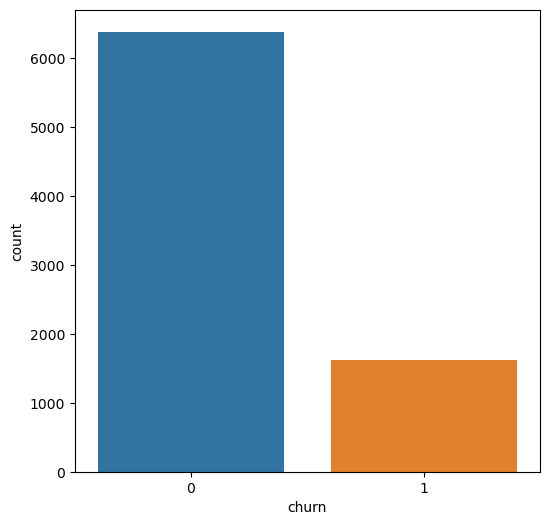

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0              age             3.4625
1  products_number             0.6125
2     credit_score             0.1625
3            churn            20.2875


Analysis complete. No action taken.                                                     


All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711958113264385"'7


['country', 'gender']


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


customer_id,credit_score,country_0,country_1,country_2,gender_0,gender_1,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,id
15704053,710,0,0,1,0,1,62,3,131078.42,2,1,0,119348.76,1,9
15609618,721,0,1,0,0,1,28,9,154475.54,2,0,1,101300.94,1,10
15806808,834,0,1,0,1,0,57,8,112281.6,3,1,0,140225.14,1,18
15614716,515,1,0,0,1,0,37,0,196853.62,1,1,1,132770.11,0,12
15603582,569,0,0,1,1,0,34,3,0.0,1,1,0,133997.53,0,11
15674811,739,0,1,0,0,1,29,3,59385.98,2,1,1,105533.96,0,19
15667633,612,1,0,0,1,0,38,1,0.0,2,1,1,9209.21,0,15
15783398,535,0,0,1,1,0,49,7,115309.75,1,1,0,111421.77,0,23
15679909,665,0,0,1,0,1,41,8,0.0,2,1,0,132152.32,0,14
15694530,672,1,0,0,0,1,28,4,167268.98,1,1,1,169469.3,0,22


customer_id,credit_score,country_0,country_1,country_2,gender_0,gender_1,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,id
15644896,663,0,1,0,0,1,32,3,108586.86,1,1,1,182355.21,0,30
15602909,604,0,0,1,1,0,41,10,0.0,2,1,1,166224.39,0,24
15623219,596,1,0,0,0,1,33,8,0.0,1,1,0,121189.3,1,120
15611759,850,0,0,1,1,0,57,8,126776.3,2,1,1,132298.49,0,26
15629133,579,1,0,0,1,0,27,9,0.0,2,1,0,126838.7,0,29
15703563,774,1,0,0,0,1,40,9,93017.47,2,1,0,191608.97,0,125
15663942,639,1,0,0,1,0,38,5,0.0,2,0,0,93716.38,0,25
15718245,730,1,0,0,0,1,34,1,0.0,2,1,1,126592.01,0,121
15791045,568,1,0,0,1,0,38,3,132951.92,1,0,1,124486.28,0,28
15645956,452,0,0,1,0,1,44,3,88915.85,1,1,0,69697.74,0,124


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0              age             3.4625
1  products_number             0.6125
2     credit_score             0.1625
3            churn            20.2875


['credit_score', 'age', 'products_number']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711962161904403"'7


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711965068275969"'7
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711958259564884"'


['gender_0', 'customer_id', 'products_number', 'estimated_salary', 'country_0', 'credit_score', 'age', 'country_1', 'balance', 'credit_card', 'country_2', 'active_member', 'tenure', 'gender_1']


['customer_id', 'products_number', 'estimated_salary', 'credit_score', 'age', 'balance', 'credit_card', 'active_member', 'tenure']


gender_0,country_0,country_1,country_2,id,churn,gender_1,customer_id,products_number,estimated_salary,credit_score,age,balance,credit_card,active_member,tenure
1,1,0,0,2,1,0,0.18662660676350923,0.0,0.6310715673346804,0.6602564102564102,0.29545454545454547,0.16307637096798944,1.0,0.0,0.5
1,0,1,0,4,1,0,0.3073664080909269,0.0,0.704704149246253,0.6923076923076923,0.6590909090909091,0.5742985927075014,1.0,0.0,1.0
0,0,1,0,5,0,1,0.834380838457507,0.5,0.8054366692019087,0.4594017094017094,0.7727272727272727,0.3335750383751427,1.0,1.0,0.8
1,1,0,0,6,0,0,0.18768678063202365,0.5,0.4311941790440986,0.5,0.4318181818181818,0.0,1.0,0.0,0.6
1,0,1,0,8,0,0,0.2713885077152653,0.5,0.8628877057759017,0.33760683760683763,0.5454545454545454,0.3478360875525198,1.0,0.0,0.9
0,0,1,0,9,0,1,0.8914862037374129,0.5,0.8838694595333854,0.7970085470085471,0.5,0.5477555448907563,0.0,0.0,0.2
0,1,0,0,7,0,1,0.03553782820382543,0.0,0.19721638416468767,0.6153846153846154,0.3409090909090909,0.5049049596192622,1.0,1.0,0.8
0,1,0,0,3,0,1,0.10292487968026756,0.5,0.860511278827128,0.8525641025641025,0.25,0.0,0.0,0.0,0.9
0,1,0,0,1,0,1,0.5918410619341572,0.0,0.9261676490104805,0.6773504273504274,0.36363636363636365,0.468192763045745,1.0,0.0,0.2
1,1,0,0,0,0,0,0.8888777759552566,0.5,0.0940827849059585,0.6623931623931624,0.2727272727272727,0.0,1.0,1.0,0.7


gender_0,country_0,country_1,country_2,id,churn,gender_1,customer_id,products_number,estimated_salary,credit_score,age,balance,credit_card,active_member,tenure
1,0,1,0,242,0,0,0.19674026540352618,0.0,0.6192541387702525,0.594017094017094,0.25,0.7194964696622442,1.0,1.0,0.6
1,0,1,0,370,1,0,0.4156201617065199,0.0,0.5823534147511087,0.2329059829059829,1.1363636363636365,0.37879570944521734,0.0,1.0,0.1
0,1,0,0,371,0,1,0.015302509611576299,0.5,0.3898677823732166,0.46794871794871795,0.5,0.3930963763016291,0.0,0.0,1.0
1,0,1,0,450,1,0,0.3066262867110206,0.0,0.03780326021135018,0.7094017094017094,0.7045454545454546,0.37090493594431106,1.0,0.0,0.4
1,0,0,1,538,0,0,0.2072579903104109,0.5,0.4030760437621792,0.3162393162393162,0.4090909090909091,0.0,1.0,0.0,0.7
0,1,0,0,675,0,1,0.3826547553798823,0.5,0.3283508075021164,0.5363247863247863,0.38636363636363635,0.0,1.0,0.0,1.0
0,1,0,0,483,0,1,0.686548593969411,0.0,0.923304625591744,0.5363247863247863,0.25,0.5189608258875147,1.0,0.0,1.0
0,1,0,0,243,0,1,0.40901507847286955,0.5,0.08196047722557502,0.5256410256410257,0.3181818181818182,0.5944099056314059,1.0,1.0,0.9
0,1,0,0,203,0,1,0.4098312123188203,0.5,0.8768931432951846,0.6794871794871795,0.4318181818181818,0.30932264171480944,1.0,1.0,0.3
1,1,0,0,186,0,0,0.33738733152236966,0.0,0.8121599112715263,0.3888888888888889,0.22727272727272727,0.0,1.0,1.0,0.1


['gender_0', 'customer_id', 'country_0', 'country_2', 'tenure', 'gender_1', 'products_number', 'credit_score', 'age', 'country_1', 'active_member', 'balance', 'estimated_salary']


['r_customer_id', 'r_tenure', 'r_products_number', 'r_credit_score', 'r_age', 'r_active_member', 'r_balance', 'r_estimated_salary']


r_gender_0,r_country_0,r_country_2,r_gender_1,r_country_1,id,churn,r_customer_id,r_tenure,r_products_number,r_credit_score,r_age,r_active_member,r_balance,r_estimated_salary
1,1,0,0,0,2,1,0.18662660676350923,0.5,0.0,0.6602564102564102,0.29545454545454547,0.0,0.16307637096798944,0.6310715673346804
1,0,0,0,1,4,1,0.3073664080909269,1.0,0.0,0.6923076923076923,0.6590909090909091,0.0,0.5742985927075014,0.704704149246253
0,0,0,1,1,5,0,0.834380838457507,0.8,0.5,0.4594017094017094,0.7727272727272727,1.0,0.3335750383751427,0.8054366692019087
1,1,0,0,0,6,0,0.18768678063202365,0.6,0.5,0.5,0.4318181818181818,0.0,0.0,0.4311941790440986
1,0,0,0,1,8,0,0.2713885077152653,0.9,0.5,0.33760683760683763,0.5454545454545454,0.0,0.3478360875525198,0.8628877057759017
0,0,0,1,1,9,0,0.8914862037374129,0.2,0.5,0.7970085470085471,0.5,0.0,0.5477555448907563,0.8838694595333854
0,1,0,1,0,7,0,0.03553782820382543,0.8,0.0,0.6153846153846154,0.3409090909090909,1.0,0.5049049596192622,0.19721638416468767
0,1,0,1,0,3,0,0.10292487968026756,0.9,0.5,0.8525641025641025,0.25,0.0,0.0,0.860511278827128
0,1,0,1,0,1,0,0.5918410619341572,0.2,0.0,0.6773504273504274,0.36363636363636365,0.0,0.468192763045745,0.9261676490104805
1,1,0,0,0,0,0,0.8888777759552566,0.7,0.5,0.6623931623931624,0.2727272727272727,1.0,0.0,0.0940827849059585


r_gender_0,r_country_0,r_country_2,r_gender_1,r_country_1,id,churn,r_customer_id,r_tenure,r_products_number,r_credit_score,r_age,r_active_member,r_balance,r_estimated_salary
1,0,0,0,1,242,0,0.19674026540352618,0.6,0.0,0.594017094017094,0.25,1.0,0.7194964696622442,0.6192541387702525
1,0,0,0,1,370,1,0.4156201617065199,0.1,0.0,0.2329059829059829,1.1363636363636365,1.0,0.37879570944521734,0.5823534147511087
0,1,0,1,0,371,0,0.015302509611576299,1.0,0.5,0.46794871794871795,0.5,0.0,0.3930963763016291,0.3898677823732166
1,0,0,0,1,450,1,0.3066262867110206,0.4,0.0,0.7094017094017094,0.7045454545454546,0.0,0.37090493594431106,0.03780326021135018
1,0,1,0,0,538,0,0.2072579903104109,0.7,0.5,0.3162393162393162,0.4090909090909091,0.0,0.0,0.4030760437621792
0,1,0,1,0,675,0,0.3826547553798823,1.0,0.5,0.5363247863247863,0.38636363636363635,0.0,0.0,0.3283508075021164
0,1,0,1,0,483,0,0.686548593969411,1.0,0.0,0.5363247863247863,0.25,0.0,0.5189608258875147,0.923304625591744
0,1,0,1,0,243,0,0.40901507847286955,0.9,0.5,0.5256410256410257,0.3181818181818182,1.0,0.5944099056314059,0.08196047722557502
0,1,0,1,0,203,0,0.4098312123188203,0.3,0.5,0.6794871794871795,0.4318181818181818,1.0,0.30932264171480944,0.8768931432951846
1,1,0,0,0,186,0,0.33738733152236966,0.1,0.0,0.3888888888888889,0.22727272727272727,1.0,0.0,0.8121599112715263


['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']


gender_0,country_0,country_1,country_2,id,churn,gender_1,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,0,1,0,10,1,1,0.17569681427754152,0.7243589743589743,0.22727272727272727,0.9,0.6156903785118493,0.5,0.0,1.0,0.5064951702887626
1,1,0,0,12,0,0,0.19609215911409472,0.2841880341880342,0.4318181818181818,0.0,0.7845959289686103,0.0,1.0,1.0,0.663856048252608
1,1,0,0,20,0,0,0.73167199420705,0.7564102564102564,0.2727272727272727,0.9,0.0,0.5,1.0,0.0,0.1708600671364115
0,0,0,1,9,1,1,0.553498773798903,0.7008547008547008,1.0,0.3,0.5224368985830065,0.5,1.0,0.0,0.5967428889458942
1,1,0,0,13,1,0,0.49312887313519416,0.7457264957264957,0.7727272727272727,1.0,0.0,0.0,1.0,1.0,0.12494778251323
1,0,0,1,21,0,0,0.5636964462171796,0.8076923076923077,0.3409090909090909,0.1,0.47076595919881253,0.5,0.0,1.0,0.7833179568648805
0,0,0,1,14,0,1,0.45690693273696886,0.6047008547008547,0.5227272727272727,0.8,0.0,0.5,1.0,0.0,0.6607668032297085
0,1,0,0,22,0,1,0.5154005256862125,0.6196581196581197,0.22727272727272727,0.4,0.6666809619794236,0.0,1.0,1.0,0.8473695237895218
1,1,0,0,15,0,0,0.40779487836005107,0.49145299145299143,0.45454545454545453,0.1,0.0,0.5,1.0,1.0,0.04599254228778847
1,0,0,1,23,0,0,0.8709308326565557,0.3269230769230769,0.7045454545454546,0.7,0.4595879944721779,0.0,1.0,0.0,0.5571041534466541


gender_0,country_0,country_1,country_2,id,churn,gender_1,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,1,0,0,27,0,1,0.2314979656663693,0.7094017094017094,0.5,0.9,0.1854166765478366,0.0,1.0,1.0,0.4834245170413774
1,0,0,1,24,0,0,0.14885641245164208,0.47435897435897434,0.5227272727272727,1.0,0.0,0.5,1.0,1.0,0.8311434241970108
0,1,0,0,120,1,1,0.23010973799703152,0.45726495726495725,0.3409090909090909,0.8,0.0,0.0,1.0,0.0,0.6059464678876832
1,1,0,0,29,0,0,0.25376961821738764,0.42094017094017094,0.20454545454545456,0.9,0.0,0.5,1.0,0.0,0.6341961657338275
0,0,1,0,30,0,1,0.3168319604415124,0.6004273504273504,0.3181818181818182,0.3,0.43279269284194233,0.0,1.0,1.0,0.9118052273992165
0,1,0,0,126,0,1,0.15440132181677796,0.344017094017094,0.4090909090909091,0.6,0.0,0.5,1.0,0.0,0.883667890283522
1,1,0,0,31,0,0,0.308510595737701,1.0,0.20454545454545456,0.7,0.17400821983140646,0.5,1.0,1.0,0.015070989279476187
0,1,0,0,127,0,1,0.19519201148988435,0.33547008547008544,0.4772727272727273,0.3,0.5546223169733975,0.5,1.0,0.0,0.7383242599668267
1,1,0,0,25,0,0,0.39302845666689334,0.5491452991452992,0.45454545454545453,0.5,0.0,0.5,0.0,0.0,0.4685687483154641
0,1,0,0,121,0,1,0.6102760852779856,0.7435897435897436,0.36363636363636365,0.1,0.0,0.5,1.0,1.0,0.632962597928102


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


response_column : churn                                                                                                                               
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.1, 0.2)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
iter_num : (10, 30, 40)
Total number of models for xgboost : 3456
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.2, 0.3)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
num_trees : (-1, 30, 40)
Total number of models for decision_forest : 108
---------------------------------------------------------------------------------------------------------------------------------

XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


DECISIONFOREST_0                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


KNN_9                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,decision_forest,lasso,0.820000,0.820000,0.820000,0.820000,0.721502,0.717406,0.719407,0.818369,0.820000,0.819160
1,2,decision_forest,rfe,0.817500,0.817500,0.817500,0.817500,0.719905,0.730739,0.724985,0.822240,0.817500,0.819693
2,3,xgboost,pca,0.811875,0.811875,0.811875,0.811875,0.764850,0.555264,0.551599,0.794873,0.811875,0.754439
3,4,decision_forest,pca,0.806875,0.806875,0.806875,0.806875,0.807277,0.530347,0.505600,0.807030,0.806875,0.734752
4,5,xgboost,lasso,0.800625,0.800625,0.800625,0.800625,0.710813,0.762564,0.727942,0.832008,0.800625,0.811435
5,6,knn,rfe,0.791875,0.791875,0.791875,0.791875,0.684027,0.697466,0.690072,0.799927,0.791875,0.795539
6,7,knn,lasso,0.788125,0.788125,0.788125,0.788125,0.669751,0.663017,0.666197,0.784035,0.788125,0.785981
7,8,xgboost,rfe,0.787500,0.787500,0.787500,0.787500,0.702318,0.764646,0.719451,0.831588,0.787500,0.801490
8,9,knn,pca,0.760625,0.760625,0.760625,0.760625,0.593998,0.567813,0.574006,0.729525,0.760625,0.741417


In [16]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.churn)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,decision_forest,lasso,0.820000,0.820000,0.820000,0.820000,0.721502,0.717406,0.719407,0.818369,0.820000,0.819160
1,2,decision_forest,rfe,0.817500,0.817500,0.817500,0.817500,0.719905,0.730739,0.724985,0.822240,0.817500,0.819693
2,3,xgboost,pca,0.811875,0.811875,0.811875,0.811875,0.764850,0.555264,0.551599,0.794873,0.811875,0.754439
3,4,decision_forest,pca,0.806875,0.806875,0.806875,0.806875,0.807277,0.530347,0.505600,0.807030,0.806875,0.734752
4,5,xgboost,lasso,0.800625,0.800625,0.800625,0.800625,0.710813,0.762564,0.727942,0.832008,0.800625,0.811435
5,6,knn,rfe,0.791875,0.791875,0.791875,0.791875,0.684027,0.697466,0.690072,0.799927,0.791875,0.795539
6,7,knn,lasso,0.788125,0.788125,0.788125,0.788125,0.669751,0.663017,0.666197,0.784035,0.788125,0.785981
7,8,xgboost,rfe,0.787500,0.787500,0.787500,0.787500,0.702318,0.764646,0.719451,0.831588,0.787500,0.801490
8,9,knn,pca,0.760625,0.760625,0.760625,0.760625,0.593998,0.567813,0.574006,0.729525,0.760625,0.741417


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,decision_forest,lasso,0.82,0.82,0.82,0.82,0.721502,0.717406,0.719407,0.818369,0.82,0.81916


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [19]:
# Generating prediction and metrics on default test data
prediction = aml.predict(rank=2)

decision_forest rfe

 Prediction : 
    id  prediction  prob  churn
0  242           0   0.5      0
1  370           1   1.0      1
2  371           0   1.0      0
3  450           1   1.0      1
4  538           0   0.5      0
5  675           0   1.0      0
6  483           0   1.0      0
7  243           0   1.0      0
8  203           0   1.0      0
9  186           0   0.5      0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1     1118      135   0.892259  0.876863  0.884494     1275
1               1  CLASS_2      157      190   0.547550  0.584615  0.565476      325

 ROC-AUC : 


AUC,GINI
0.6947450980392157,0.3894901960784314


threshold_value,tpr,fpr
0.04081632653061224,0.5846153846153846,0.12313725490196079
0.08163265306122448,0.5846153846153846,0.12313725490196079
0.1020408163265306,0.5846153846153846,0.12313725490196079
0.12244897959183673,0.5846153846153846,0.12313725490196079
0.16326530612244897,0.5846153846153846,0.12313725490196079
0.18367346938775508,0.5846153846153846,0.12313725490196079
0.14285714285714285,0.5846153846153846,0.12313725490196079
0.061224489795918366,0.5846153846153846,0.12313725490196079
0.02040816326530612,0.5846153846153846,0.12313725490196079
0.0,1.0,1.0



 Confusion Matrix : 


array([[1118,  157],
       [ 135,  190]], dtype=int64)

In [20]:
# Printing prediction
prediction.head()

id,prediction,prob,churn
26,1,1.0,0
28,0,0.5,0
29,0,0.5,0
30,0,1.0,0
120,0,0.5,1
121,0,1.0,0
31,0,0.5,0
27,0,1.0,0
25,0,0.5,0
24,0,0.5,0


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after performing target column transformation :


customer_id,products_number,estimated_salary,credit_score,age,id,balance,credit_card,country,active_member,tenure,gender,churn
15668775,1,143829.54,757,47,9,130747.1,1,France,0,3,Male,0
15576216,1,79555.08,655,37,10,108862.76,1,Germany,0,4,Female,1
15778830,2,173240.52,841,31,18,0.0,1,France,0,2,Male,0
15583863,1,187280.51,681,49,14,142946.18,0,Germany,0,8,Male,1
15809826,1,20276.87,728,46,15,109705.52,1,France,0,2,Female,1
15568834,2,27654.44,698,27,23,125427.37,0,Spain,0,6,Male,0
15675749,2,141756.32,695,23,13,0.0,1,France,1,1,Female,0
15768777,2,60688.38,507,34,21,0.0,1,Spain,1,4,Female,0
15618203,2,86701.4,773,51,11,116197.65,1,Germany,1,8,Male,0
15681316,2,175722.31,681,41,19,120549.29,1,France,0,0,Female,0


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711959375228093"'

Updated dataset after performing categorical encoding :


customer_id,products_number,estimated_salary,credit_score,age,id,balance,credit_card,country_0,country_1,country_2,active_member,tenure,gender_0,gender_1,churn
15754747,2,184036.47,686,33,25,141918.09,0,0,1,0,1,9,0,1,0
15680683,2,141453.62,640,29,41,197200.04,1,0,0,1,0,5,0,1,0
15572361,1,199420.41,790,34,49,164011.48,1,0,1,0,0,2,1,0,0
15812007,2,78358.94,670,25,57,0.0,1,0,0,1,1,6,0,1,0
15667265,1,159618.17,729,39,73,121404.64,1,1,0,0,1,4,0,1,0
15717164,2,194010.12,485,32,81,102238.01,1,0,0,1,1,6,0,1,0
15587451,1,63337.19,778,41,65,139706.31,1,0,1,0,0,7,0,1,0
15767757,1,6795.61,562,29,33,120307.58,1,0,0,1,1,9,1,0,0
15700627,1,166996.46,637,46,17,143500.82,1,0,1,0,0,2,1,0,1
15668775,1,143829.54,757,47,9,130747.1,1,1,0,0,0,3,0,1,0


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711959142046850"'

Updated dataset after performing Lasso feature selection:


id,gender_0,customer_id,products_number,estimated_salary,country_0,credit_score,age,country_1,balance,credit_card,country_2,active_member,tenure,gender_1,churn
96,0,15633108,1,164696.27,1,646,26,0,139848.17,1,0,0,4,1,0
120,0,15781989,1,184056.45,1,733,42,0,120094.93,1,0,0,9,1,0
128,0,15636105,2,43982.41,0,758,61,0,0.0,1,1,1,2,1,0
136,0,15589754,1,115333.43,0,652,45,1,151421.44,0,0,1,2,1,0
160,0,15751788,1,175853.64,0,850,28,0,97408.03,1,1,1,9,1,0
176,0,15613673,1,134110.93,1,675,28,0,0.0,1,0,0,9,1,0
50,1,15598259,1,151349.35,0,673,41,1,98612.1,1,0,0,9,0,0
74,1,15725076,2,33389.42,0,653,27,0,107751.68,1,1,1,6,0,0
82,1,15779522,2,109355.73,1,736,24,0,0.0,1,0,0,0,0,1
90,1,15594404,2,129273.94,1,834,49,0,160602.25,1,0,0,8,0,0



Updated dataset after performing scaling on Lasso selected features :


gender_0,country_0,country_1,country_2,id,churn,gender_1,customer_id,products_number,estimated_salary,credit_score,age,balance,credit_card,active_member,tenure
0,1,0,0,96,0,1,0.2696722262451042,0.0,0.8235020944500199,0.5641025641025641,0.18181818181818182,0.5573903332624015,1.0,0.0,0.4
0,1,0,0,120,0,1,0.865293908200945,0.0,0.9203122398189028,0.75,0.5454545454545454,0.47866020024305483,1.0,0.0,0.9
0,0,0,1,128,0,1,0.28166219259958636,0.5,0.2198751480766413,0.8034188034188035,0.9772727272727273,0.0,1.0,1.0,0.2
0,0,1,0,136,0,1,0.0962277813561424,0.0,0.5766643214426976,0.5769230769230769,0.6136363636363636,0.6035177071296158,0.0,1.0,0.2
0,0,0,1,160,0,1,0.7444700930952676,0.0,0.8792942726030336,1.0,0.22727272727272727,0.38823743138100414,1.0,1.0,0.9
0,1,0,0,176,0,1,0.1919194747938662,0.0,0.670560788555307,0.6260683760683761,0.22727272727272727,0.0,1.0,0.0,0.9
1,0,1,0,50,0,0,0.1302533615512944,0.0,0.7567611206870256,0.6217948717948718,0.5227272727272727,0.3930364715012378,1.0,0.0,0.9
1,0,0,1,74,0,0,0.6376045671490125,0.5,0.16690513944081656,0.5790598290598291,0.20454545454545456,0.42946393095300167,1.0,1.0,0.6
1,1,0,0,82,1,0,0.8554242895834917,0.5,0.5467729668183311,0.7564102564102564,0.13636363636363635,0.0,1.0,0.0,0.0
1,1,0,0,90,0,0,0.11483083225649006,0.5,0.646373528671988,0.9658119658119658,0.7045454545454546,0.6401094962500512,1.0,0.0,0.8



Updated dataset after performing RFE feature selection:


id,gender_0,customer_id,country_0,country_2,tenure,gender_1,products_number,credit_score,age,country_1,active_member,balance,estimated_salary,churn
82,1,15779522,1,0,0,0,2,736,24,0,0,0.0,109355.73,1
106,1,15771059,0,0,2,0,1,756,34,1,0,148200.72,194584.48,0
114,1,15625175,0,0,6,0,1,742,43,1,1,97067.69,60920.03,1
130,1,15773322,0,0,4,0,1,536,44,1,0,121898.82,131007.18,0
178,1,15679743,1,0,8,0,1,607,33,0,1,91301.72,130824.57,0
186,1,15813412,1,0,3,0,1,721,55,0,0,44020.89,65864.4,1
48,0,15616367,0,0,1,1,1,581,39,1,0,121523.51,161655.55,1
72,0,15764922,0,1,3,1,1,596,20,0,0,187294.46,103456.47,0
96,0,15633108,1,0,4,1,1,646,26,0,0,139848.17,164696.27,0
104,0,15796957,0,1,9,1,3,597,35,0,1,0.0,73181.39,1



Updated dataset after performing scaling on RFE selected features :


r_gender_0,r_country_0,r_country_2,r_gender_1,r_country_1,id,churn,r_customer_id,r_tenure,r_products_number,r_credit_score,r_age,r_active_member,r_balance,r_estimated_salary
1,1,0,0,0,82,1,0.8554242895834917,0.0,0.5,0.7564102564102564,0.13636363636363635,0.0,0.0,0.5467729668183311
1,0,0,0,1,106,0,0.8215667369448589,0.2,0.0,0.7991452991452992,0.36363636363636365,0.0,0.5906809414133045,0.9729574174333648
1,0,0,0,1,114,1,0.23793502134350034,0.6,0.0,0.7692307692307693,0.5681818181818182,1.0,0.38688094437068055,0.3045713365626417
1,0,0,0,1,130,0,0.8306202217163615,0.4,0.0,0.32905982905982906,0.5909090909090909,0.0,0.48584993213778555,0.6550405563731335
1,1,0,0,0,178,0,0.456242823823107,0.8,0.0,0.4807692307692308,0.3409090909090909,1.0,0.36389962155550887,0.6541274191685306
1,1,0,0,0,186,1,0.9910065250701114,0.3,0.0,0.7243589743589743,0.8409090909090909,0.0,0.17545326869566844,0.3292955477248076
0,0,0,1,1,48,1,0.20269724234774503,0.1,0.0,0.4252136752136752,0.4772727272727273,0.0,0.4843540658280818,0.808297042367546
0,0,1,1,0,72,0,0.7970147104125076,0.3,0.0,0.45726495726495725,0.045454545454545456,0.0,0.7464961570652052,0.5172738496526418
0,1,0,1,0,96,0,0.2696722262451042,0.4,0.0,0.5641025641025641,0.18181818181818182,0.0,0.5573903332624015,0.8235020944500199
0,0,1,1,0,104,1,0.9251757288195264,0.9,1.0,0.4594017094017094,0.38636363636363635,1.0,0.0,0.36588399192122845



Updated dataset after performing scaling for PCA feature selection :


gender_0,country_0,country_1,country_2,id,churn,gender_1,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1,1,0,0,82,1,0,0.8554242895834917,0.7564102564102564,0.13636363636363635,0.0,0.0,0.5,1.0,0.0,0.5467729668183311
1,0,1,0,106,0,0,0.8215667369448589,0.7991452991452992,0.36363636363636365,0.2,0.5906809414133045,0.0,0.0,0.0,0.9729574174333648
1,0,1,0,114,1,0,0.23793502134350034,0.7692307692307693,0.5681818181818182,0.6,0.38688094437068055,0.0,0.0,1.0,0.3045713365626417
1,0,1,0,130,0,0,0.8306202217163615,0.32905982905982906,0.5909090909090909,0.4,0.48584993213778555,0.0,0.0,0.0,0.6550405563731335
1,1,0,0,178,0,0,0.456242823823107,0.4807692307692308,0.3409090909090909,0.8,0.36389962155550887,0.0,0.0,1.0,0.6541274191685306
1,1,0,0,186,1,0,0.9910065250701114,0.7243589743589743,0.8409090909090909,0.3,0.17545326869566844,0.0,1.0,0.0,0.3292955477248076
0,0,1,0,48,1,1,0.20269724234774503,0.4252136752136752,0.4772727272727273,0.1,0.4843540658280818,0.0,0.0,0.0,0.808297042367546
0,0,0,1,72,0,1,0.7970147104125076,0.45726495726495725,0.045454545454545456,0.3,0.7464961570652052,0.0,1.0,0.0,0.5172738496526418
0,1,0,0,96,0,1,0.2696722262451042,0.5641025641025641,0.18181818181818182,0.4,0.5573903332624015,0.0,1.0,0.0,0.8235020944500199
0,0,0,1,104,1,1,0.9251757288195264,0.4594017094017094,0.38636363636363635,0.9,0.0,1.0,0.0,1.0,0.36588399192122845



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,churn
0,50,0.851930,0.605740,-0.836768,0.101455,-0.253580,0.045409,0.590493,-0.124493,0.029810,-0.048064,0
1,48,-0.552449,0.714054,-0.824882,0.030150,0.767932,-0.168398,0.042776,-0.228689,0.537555,0.160606,1
2,74,0.768047,0.536089,0.884883,-0.005072,-0.375528,-0.000152,-0.096609,0.262950,-0.249097,-0.005776,0
3,72,-0.616642,0.659825,0.232610,0.797497,-0.264520,-0.406789,-0.227938,-0.345758,-0.109809,0.111729,0
4,82,0.751446,-0.692220,-0.217183,0.449528,-0.249744,0.186654,-0.661041,-0.047871,0.199598,-0.149624,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,192,-0.680198,-0.542769,0.138224,-0.439121,-0.330703,-0.332266,0.506391,0.085307,0.067470,0.064396,0
1996,112,-0.683953,-0.593427,0.215792,-0.392934,-0.333780,-0.048532,0.183570,-0.078776,0.013780,-0.192721,0
1997,56,-0.678668,-0.530153,0.121950,-0.444629,-0.317548,0.024858,0.234763,-0.598405,-0.391752,-0.145477,0
1998,32,-0.561297,0.703055,-0.895576,0.093993,-0.235012,-0.132301,-0.331484,-0.118245,-0.351306,0.005027,0


Data Transformation completed.
decision_forest lasso

 Prediction : 
    id  prediction  prob  churn
0   96           0   1.0      0
1  120           1   1.0      0
2  128           0   1.0      0
3  136           0   1.0      0
4  160           0   1.0      0
5  176           0   0.5      0
6   50           1   1.0      0
7   74           0   0.5      0
8   82           0   0.5      1
9   90           1   1.0      0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2      208      230   0.525114  0.555556  0.539906      414
0               0  CLASS_1     1378      184   0.882202  0.868852  0.875476     1586

 ROC-AUC : 


AUC,GINI
0.6757741347905282,0.35154826958105634


threshold_value,tpr,fpr
0.04081632653061224,0.5555555555555556,0.13114754098360656
0.08163265306122448,0.5555555555555556,0.13114754098360656
0.1020408163265306,0.5555555555555556,0.13114754098360656
0.12244897959183673,0.5555555555555556,0.13114754098360656
0.16326530612244897,0.5555555555555556,0.13114754098360656
0.18367346938775508,0.5555555555555556,0.13114754098360656
0.14285714285714285,0.5555555555555556,0.13114754098360656
0.061224489795918366,0.5555555555555556,0.13114754098360656
0.02040816326530612,0.5555555555555556,0.13114754098360656
0.0,1.0,1.0



 Confusion Matrix : 


array([[1378,  208],
       [ 184,  230]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob,churn
10,0,0.5,1
12,0,1.0,0
13,0,0.5,0
14,1,1.0,1
16,0,1.0,0
17,1,1.0,1
15,1,1.0,1
11,0,1.0,0
9,1,1.0,0
8,1,1.0,1


In [ ]:
remove_context()